### EDA Basics for Home Loan Data downloaded from Kaggle

1. Objective: Analyze historical data and find out important factors affecting the Loan Predicition and get to know the data better
2. Domain: Finance
3. Procedure: Parsing the given data and correctly checking the important columns, Correlation, Structural &  Quality Investigation,preprocessing it upto some extent 
4. Target Variable : Loan_Status
LoanAmount in thousands,LoanTerm in Months
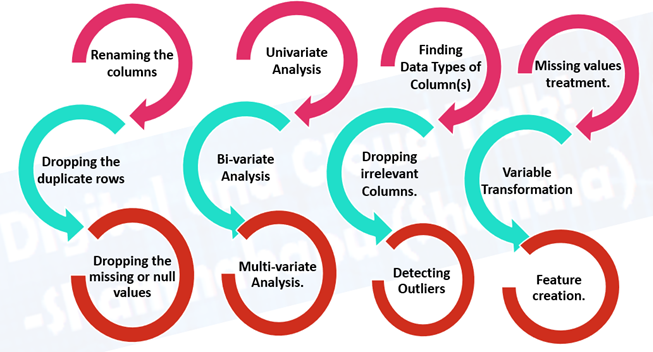



Understanding the dataset’ can refer to a number of things including but not limited to…

1. Data Sourcing
    1. Getting the input data from various sources and combining it
2. Data Cleaning
    1. Identifying outliers, missing values, or human error
3. Univariate analysis
    1. Undertanding the Characteristics of certain Variable (Understanding your variables)
4. Bivariate analysis
    1. Understanding the relationship(s), or lack of, between variables
5. Multivariate analysis
    1. Understanding the relationship(s), or lack of, between variables
6. Feature Selection /Variable Importance
    1. Extracting important variables and leaving behind useless variables
    

**Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process**


_Feature selection that involves narrowing down features manually based on domain knowledge should happen before all of these steps as part of data understanding._

_Feature selection using algorithms should happen after preprocessing._

Importing the required libraries and setting the required precision

In [1]:
import pandas as pd
pd.set_option("display.precision", 3)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
#To add any issues if present in dataset that will be resolved later 
Issues_found=[]

In [3]:
#importing the data into a dataframe
dataset_raw=pd.read_csv("train.csv",sep=",")
ds_org=pd.read_csv("train.csv",sep=",")


## Structural Investigation

In [4]:
#Checking the Shape and Structure of the dataframe
dataset_raw.shape

(614, 13)

In [5]:
#Check Top 5 rows to get a feel of the dataset
dataset_raw.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Checking the dataset column type
dataset_raw.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Specifically check the Non-numerical datatype variables in the dataset
dataset_raw.select_dtypes(exclude="number").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [8]:
#Checking in case of any null values present in the dataset
dataset_raw.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
Issues_found.append("MissingValues")

In [10]:
dataset_raw.drop('Loan_ID',axis=1,inplace=True)

In [11]:
#Checking the Distribution with respect to Target Variable
dataset_raw["Loan_Status"].value_counts(normalize=True)


Y    0.687
N    0.313
Name: Loan_Status, dtype: float64

In [12]:
Issues_found.append("imbalanaced data")

### Insights From the Invesigation: 

Dataset seems to be Imabalanced in nature, as there are less records for the No .
Some Missing values are found, which will be cleaned in the below phases.


## Quality Investigation


In [13]:
# Check number of duplicates while ignoring the index feature
n_duplicates = dataset_raw.drop(labels=["Loan_Status"], axis=1).duplicated().sum()
print("Duplicate Entries : ",n_duplicates)

Duplicate Entries :  0


In [14]:
# Drop duplicates where index is duplicated
columns_Exe_Index = dataset_raw.drop(labels=["Loan_Status"], axis=1).columns
dataset_raw = dataset_raw.drop_duplicates(subset=columns_Exe_Index)
dataset_raw.shape

(614, 12)

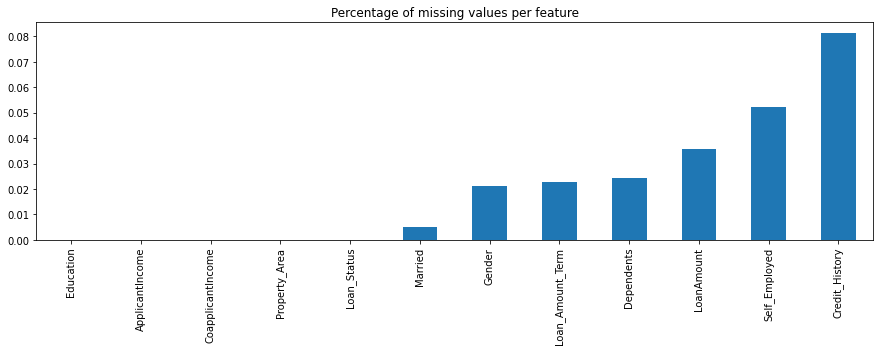

In [15]:
# Percentage of missing values with respect to each feature in the dataset.
dataset_raw.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
                                             title="Percentage of missing values per feature");


### Missing Values

If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.

There are mainly three types of missing values.

MCAR(Missing completely at random): These values do not depend on any other features.

MAR(Missing at random): These values may be dependent on some other features.

MNAR(Missing not at random): These missing values have some reason for why they are missing.

Below Techniques are applied based on column type

In [16]:
#drop the rows where Loan Amount is null
dataset_raw=dataset_raw[~dataset_raw.LoanAmount.isnull()]


In [17]:
#impute with mode for Loan_amount_term
Loan_amount_term_md = dataset_raw['Loan_Amount_Term'].mode()[0]
dataset_raw['Loan_Amount_Term'].fillna(Loan_amount_term_md, inplace = True)
#Credit History null is imputed by 0 i.e. fresh
#Self Employed Null is treated as No
dataset_raw['Credit_History'].fillna(0, inplace = True)
dataset_raw['Self_Employed'].fillna('No', inplace = True)
#Since Gender,Married and Dependents are some of the important demographic information, it cannot be imputed and filled at random
# dataset_raw.dropna(subset = ['Gender','Mdf['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
dataset_raw['Married'].fillna(dataset_raw['Married'].mode()[0],inplace=True)
dataset_raw['Dependents'].fillna(dataset_raw['Dependents'].mode()[0],inplace=True)
dataset_raw['Gender'].fillna(dataset_raw['Gender'].mode()[0],inplace=True)
Issues_found.remove("MissingValues")

dataset_raw.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
####Other ways to handle the missing values:
### Drop All records with any missing values
#dataset_raw=dataset_raw.dropna()
###Drop rows with more than 20 % missing values
#dataset_raw = dataset_raw.dropna(thresh=dataset_raw.shape[1] * 0.80, axis=0).reset_index(drop=True)
###Drop columns with more than 15% missing
# dataset_raw = dataset_raw.dropna(thresh=dataset_raw.shape[0] * 0.85, axis=1)
# dataset_raw.shape

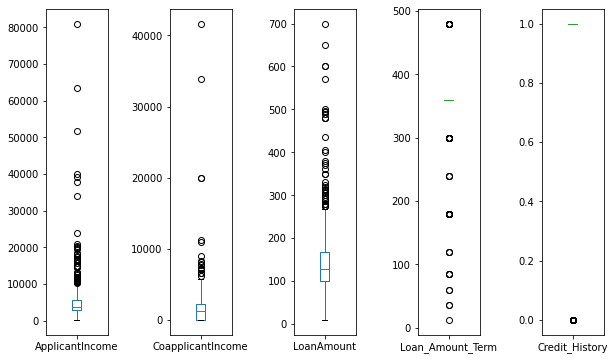

In [19]:
#checking the presence of outliers in the data (Automatically selecting the Numerical features)
dataset_raw.plot(kind='box', subplots=True, sharey=False, figsize=(10, 6))
# increase spacing between subplots
plt.subplots_adjust(wspace=1) 
plt.show()

In [20]:
Issues_found.append("OutlierValues")
#Currently not treating the outliers present in the dataset, Will come back to this in later stages.

### Content Investigation


Starting with the univariate analysis

In [21]:
#Analysing the Statistics for Non-Numerical Variables present in the dataset.
dataset_raw.describe(exclude="number")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,592,592,592,592,592,592,592
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,483,386,347,465,513,228,411


From the above analysis we can know some of the most frequent values present and the no. of unique values present in every categorical column the dataset.

We also check the Distribution of each column in the dataset.

In [22]:
Categorical_columns = list(dataset_raw.select_dtypes(exclude="number").columns)
for i in Categorical_columns:
    print(dataset_raw[i].value_counts(normalize=True)*100,'\n')


Male      81.588
Female    18.412
Name: Gender, dtype: float64 

Yes    65.203
No     34.797
Name: Married, dtype: float64 

0     58.615
2     16.554
1     16.554
3+     8.277
Name: Dependents, dtype: float64 

Graduate        78.547
Not Graduate    21.453
Name: Education, dtype: float64 

No     86.655
Yes    13.345
Name: Self_Employed, dtype: float64 

Semiurban    38.514
Urban        32.264
Rural        29.223
Name: Property_Area, dtype: float64 

Y    69.426
N    30.574
Name: Loan_Status, dtype: float64 



In [23]:
#Analysing the Statistics for Numerical Variables present in the dataset.
dataset_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000,592.000,592.000,592.000,592.000
mean,5404.304,1642.633,146.412,342.568,0.774
std,6164.073,2967.717,85.587,64.719,0.419
min,150.000,0.000,9.000,12.000,0.000
25%,2887.250,0.000,100.000,360.000,1.000
50%,3806.000,1221.000,128.000,360.000,1.000
75%,5754.500,2312.000,168.000,360.000,1.000
max,81000.000,41667.000,700.000,480.000,1.000


It looks like there are quite a bit Skewness and Kurtosis in the target variable. Let's talk about those a bit. 

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price. 
* <b>Negative Skewness</b> means the tail on the left side of the distribution is longer and fatter.
* In <b>negative Skewness </b> the mean and median will be less than the mode. 
* Skewness differentiates in extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
According to Wikipedia, 

*In probability theory and statistics, **Kurtosis** is the measure of the "tailedness" of the probability. distribution of a real-valued random variable.* So, In other words, **it is the measure of the extreme values(outliers) present in the distribution.** 

* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic, and Platykurtic</b>. 
* Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions. 

![image](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)


You can read more about this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) article. 

We can fix this by using different types of transformation(more on this later). However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

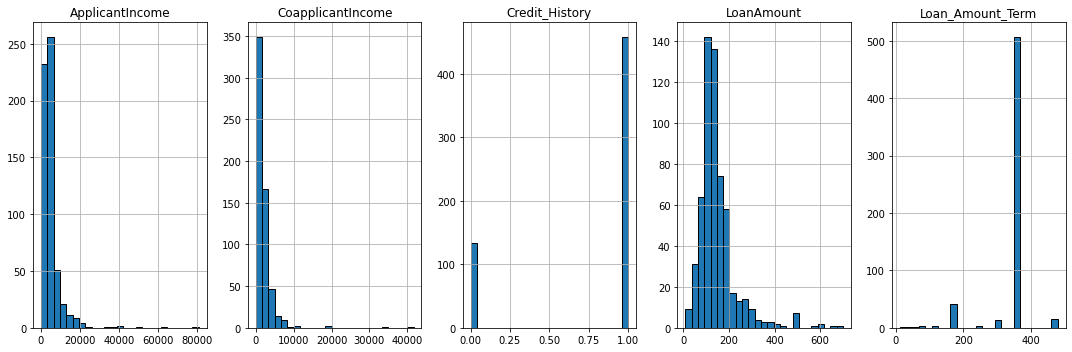

In [24]:
# Plots the histogram for each numerical feature in a separate subplot
dataset_raw.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();


Most of the columns seems to be left skewed, being a numeric feature Credit history and Loan Amount Term seems to be discrete values,rest of the values seems to be highly skewed over right, which we will process in the data cleaning and processing stage of the system.

Min-Max Columns can also be identified from the dataset and suppose if there are inappropriate data available can be removed (E.g. Age <0 and Age>100)

In [25]:
Issues_found.append("Skewed Values")

/Users/rehal/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


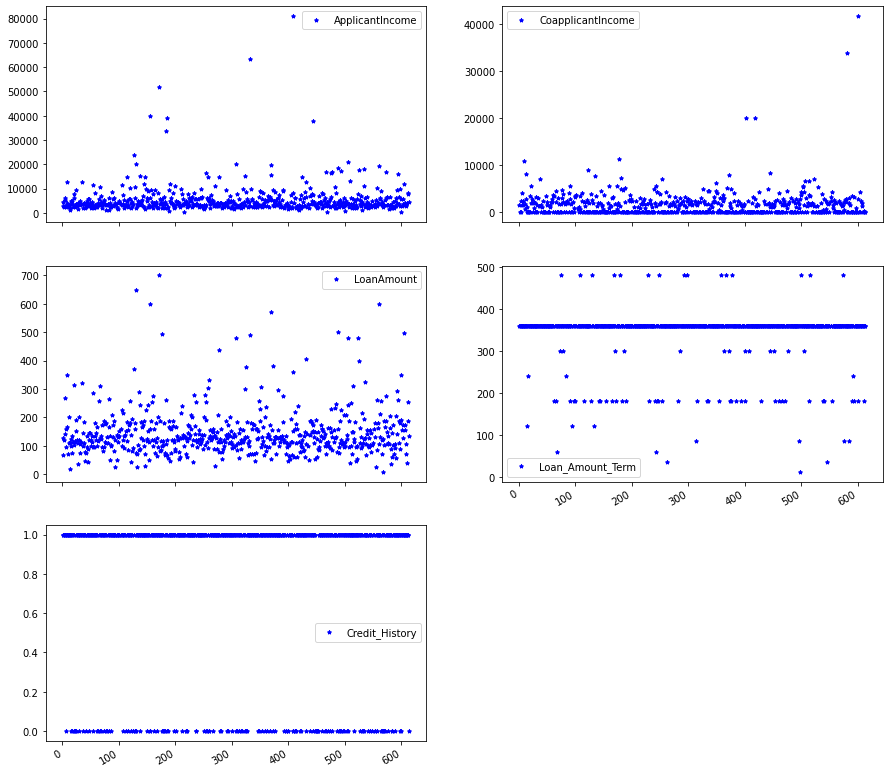

In [26]:
dataset_raw.plot(lw=0, color= 'Blue',marker="*",markersize=4, subplots=True, layout=(-1, 2), figsize=(15, 15));


check columns with no change and drop from above charts, as all the values do have some level of changes we do not drop any of them

## Bi Variate Analysis
1. Numeric-Numeric Analysis
    1. Scatter Plot
    2. Pair Plot
    3. Correlation Matrix
2. Numeric - Categorical Analysis
    1. Mean,Median
    2. Box Plots
3. Categorical — Categorical Analysis
    1. COlumns reacting to the Target Column



In [27]:
cols_continuous = dataset_raw.select_dtypes(include="number").nunique() >= 25
dataset_cont = dataset_raw[cols_continuous[cols_continuous].index]
print(dataset_cont.shape)
print(list(dataset_cont.columns))

(592, 3)
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


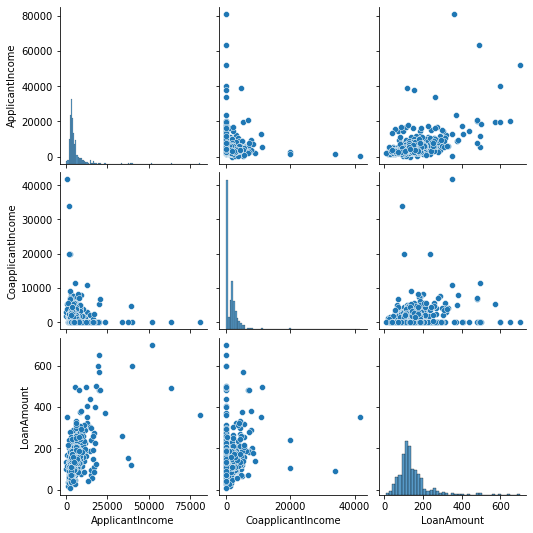

In [28]:
#check if any feature has deep correleation
sns.pairplot(data = dataset_raw, vars=list(dataset_cont.columns))
plt.show()

In [29]:
# Pearson>Linear relationship
#Spearsman > Monotonic Relationship
data_corr = dataset_raw[list(dataset_cont.columns)].corr(method="pearson")


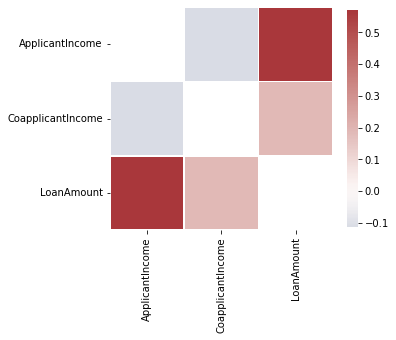

In [30]:
# Create labels for the correlation matrix
# labels = np.where(np.abs(data_corr)>0.75, "S",
#                   np.where(np.abs(data_corr)>0.5, "M",
#                            np.where(np.abs(data_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data_corr, mask=np.eye(len(data_corr)), square=True,
            center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

Applicant income and Loan Amount seems to be correlated  but not highly correlated

### MultiVariate Analysis

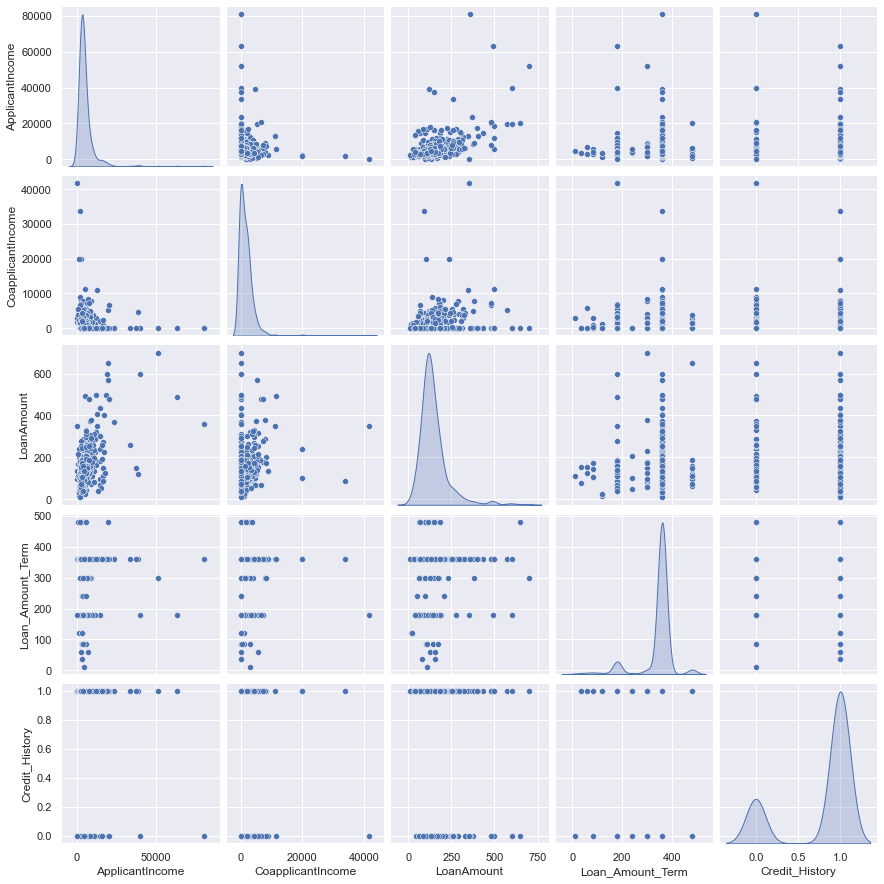

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = dataset_raw.iloc[:, :]
sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)


In [32]:
d = {"N": 0, "Y": 1}
dataset_raw["Loan_Status"] = dataset_raw["Loan_Status"].map(d)
dataset_raw.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


**Categorical Columns with the response variable**

In [33]:
Categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

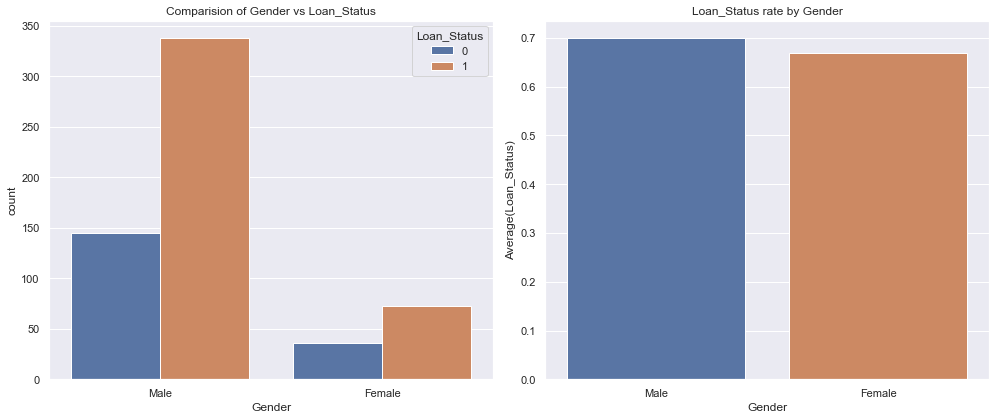

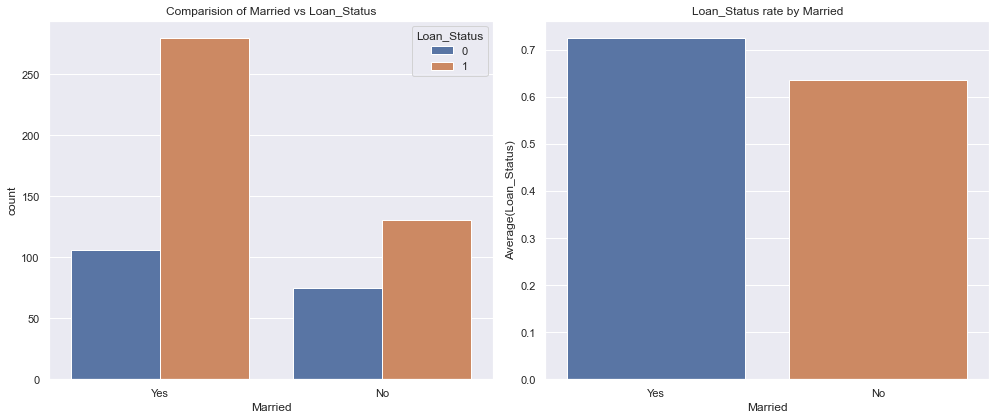

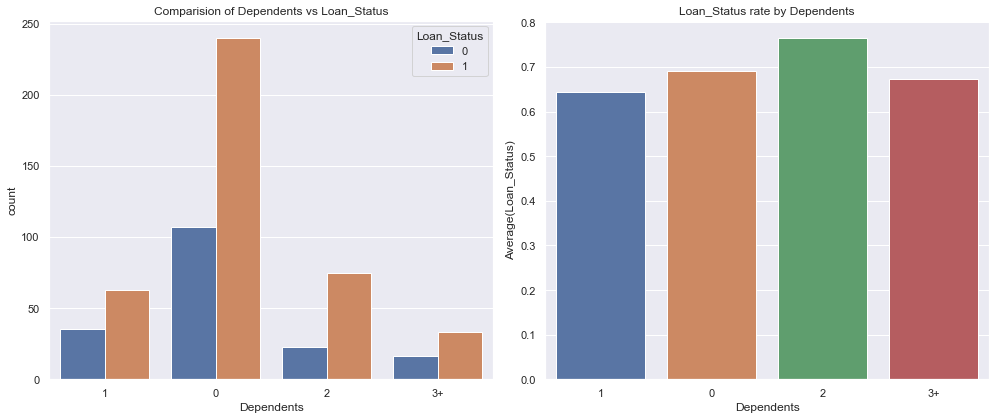

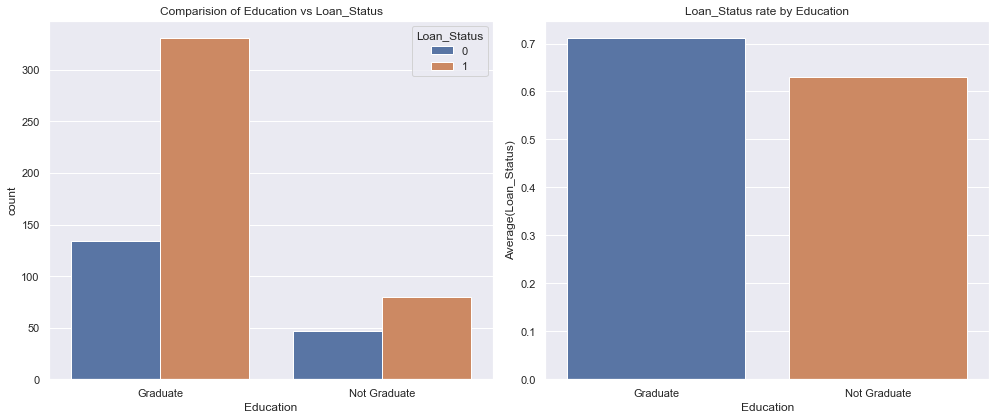

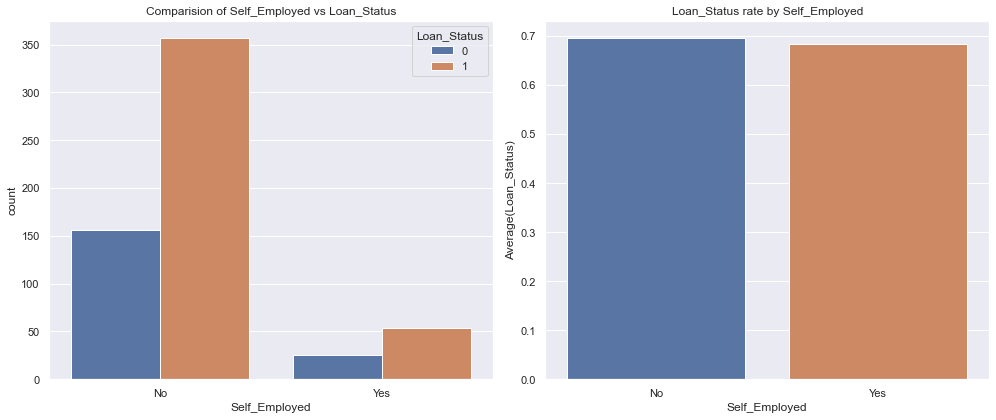

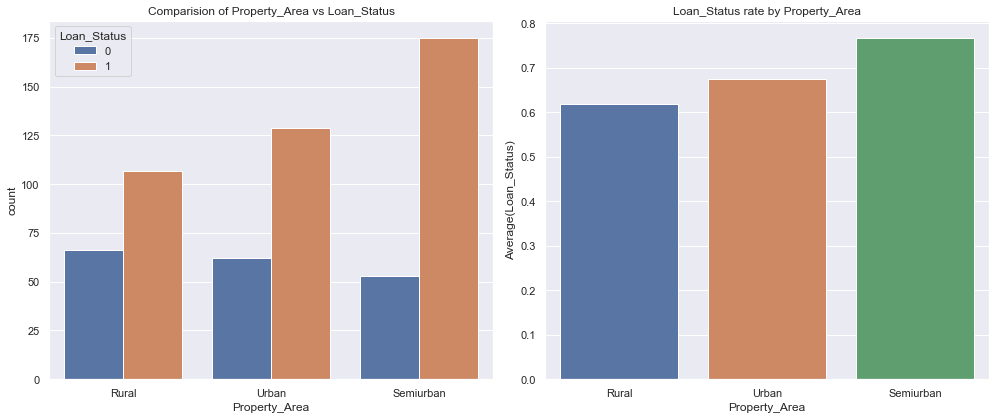

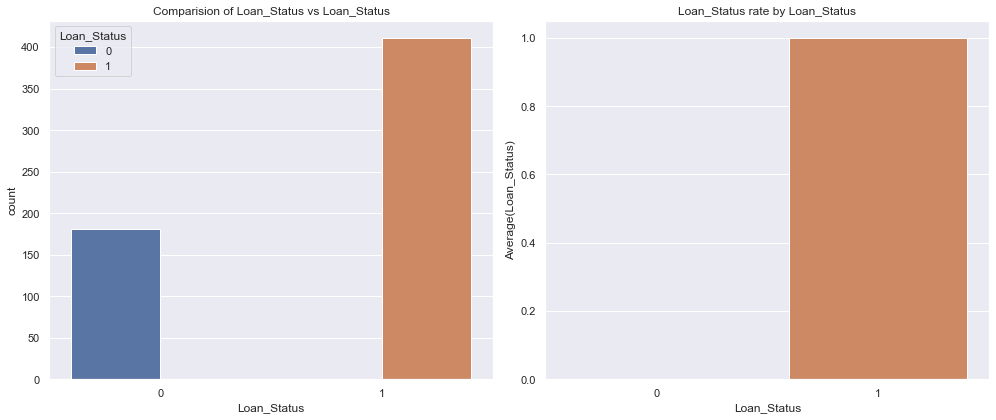

In [34]:

    
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Loan_Status"):
    
    """A function for Plotting the effect of variables(categorical data) on Loan_Status """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Loan_Status",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Loan_Status",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Loan_Status")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Loan_Status rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Loan_Status)")
    plt.tight_layout()

    plt.show()   

for i in Categorical_columns:
    CategoricalVariables_targetPlots(dataset_raw,i)


In [35]:
Issues_found.append("CategoricalEncoding")

### Feature Creation 
Since We have loan amount,income of the Applicants,Loan Term, we can calculate new values in the dataset.
Such as 
1. Total Income (Dropping Applicant and Coapplicant Income)

In [36]:
dataset_raw['TotalIncome']=(dataset_raw['ApplicantIncome']+dataset_raw['CoapplicantIncome'])
dataset_raw=dataset_raw.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

### Data Cleaning 
Checking the issues remaining and cleaning it one by one

In [37]:
set(Issues_found)

{'CategoricalEncoding', 'OutlierValues', 'Skewed Values', 'imbalanaced data'}

In [38]:
#Outlier removal Imputing with the 95% and 5% tile value
cols_continuous = dataset_raw.select_dtypes(include="number").nunique() >= 25
dataset_cont = dataset_raw[cols_continuous[cols_continuous].index]

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    a95=np.percentile(data,90)
    a5=np.percentile(data,10)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in range(len(data)): 
        if (data[i]<lwr_bound):
            data[i]=a5
        elif (data[i]>upr_bound):  
            data[i]=a95
    return data
            
for i in list(dataset_cont.columns):
#     print(sorted(dataset_raw[i]))
#     print('\n')
    dataset_raw[i]=detect_outliers_iqr(dataset_raw[i])
#     print(sorted(dataset_raw[i]))
Issues_found.remove("OutlierValues")


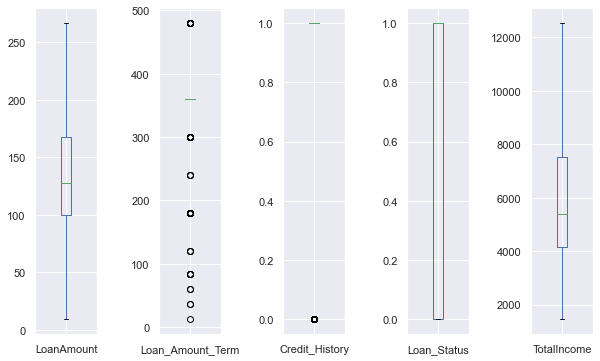

In [39]:
#checking the presence of outliers in the data (Automatically selecting the Numerical features)
dataset_raw.plot(kind='box', subplots=True, sharey=False, figsize=(10, 6))
# increase spacing between subplots
plt.subplots_adjust(wspace=1) 
plt.show()

Solving Categorical Encoding 

In [40]:
dataset_raw = pd.get_dummies(dataset_raw)
dataset_raw = dataset_raw.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed'}
       
dataset_raw.rename(columns=new, inplace=True)
Issues_found.remove("CategoricalEncoding")
dataset_raw

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,9.0,360.0,1.0,0,1442.0,1,1,0,1,0,0,1,0,1,0,0
2,17.0,360.0,1.0,1,1880.0,1,1,1,0,0,0,1,1,0,0,1
3,25.0,360.0,1.0,1,1950.0,1,1,1,0,0,0,0,0,0,0,1
4,25.0,360.0,1.0,1,1963.0,1,0,1,0,0,0,1,0,0,0,1
5,26.0,360.0,1.0,1,2138.0,1,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,235.8,360.0,1.0,1,11487.6,0,0,1,0,0,0,1,0,1,0,0
610,235.8,180.0,1.0,1,11487.6,1,1,0,0,0,1,1,0,1,0,0
611,235.8,360.0,1.0,1,11487.6,1,1,0,1,0,0,1,0,0,0,1
612,235.8,360.0,1.0,1,11487.6,1,1,0,0,1,0,1,0,0,0,1


**Solving Skewness of the data:**
    1. Log Transform (non zero)
    Log transformation is most likely the first thing you should do to remove skewness from the predictor. ()
    2.  Square Root Transform 
    The square root sometimes works great and sometimes isn’t the best suitable option. In this case, I still expect the transformed distribution to look somewhat exponential, but just due to taking a square root the range of the variable will be smaller.
    3. Box-Cox Transform. (data must be +ve and greater than zero)
This should go without saying, but you should remember what transformation you’ve performed on which attribute, because you’ll have to reverse it once when making predictions, so keep that in mind.



In [41]:
dataset_raw.TotalIncome = np.sqrt(dataset_raw.TotalIncome)
dataset_raw.LoanAmount = np.sqrt(dataset_raw.LoanAmount)

In [42]:
dataset_raw.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000,592.000
mean,11.428,342.568,0.774,0.694,76.399,0.816,0.652,0.586,0.166,0.166,0.083,0.785,0.133,0.292,0.385,0.323
std,2.334,64.719,0.419,0.461,16.696,0.388,0.477,0.493,0.372,0.372,0.276,0.411,0.340,0.455,0.487,0.468
min,3.000,12.000,0.000,0.000,37.974,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,10.000,360.000,1.000,0.000,64.545,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
50%,11.314,360.000,1.000,1.000,73.532,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
75%,12.961,360.000,1.000,1.000,86.840,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000
max,16.340,480.000,1.000,1.000,111.996,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


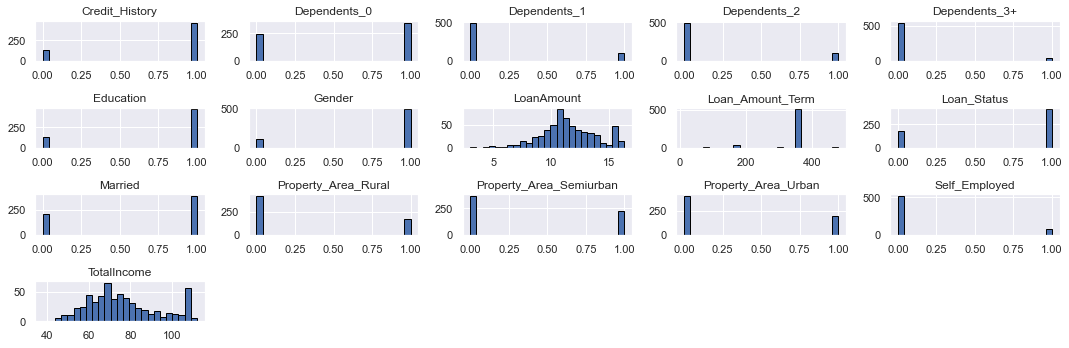

In [43]:
# Plots the histogram for each numerical feature in a separate subplot
dataset_raw.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();
Issues_found.remove("Skewed Values")


**Feature Selection/ Variable Importance**

The data features that you use to train your machine learning models have a huge in
uence on
the performance you can achieve. Irrelevant or partially relevant features can negatively impact
model performance.
1. Univariate Selection
1. Recursive Feature Elimination
1. Principal Component Analysis
1. Feature Importance

We will go with feature importance here using Random Forest

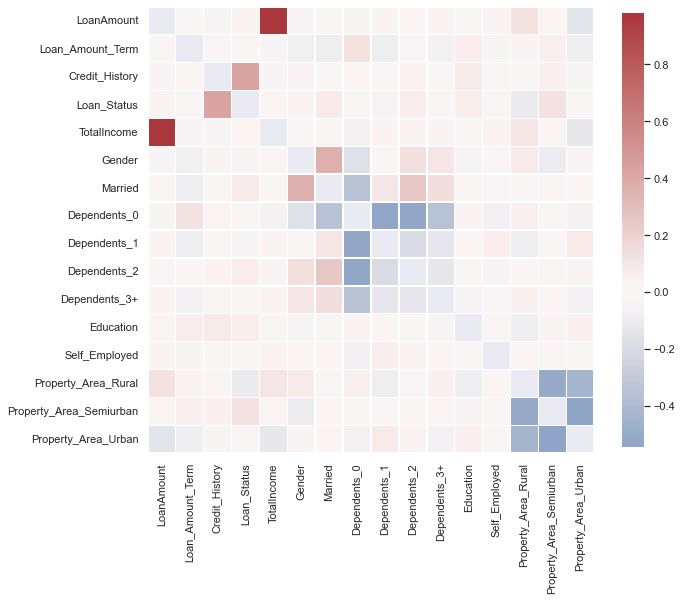

In [44]:
corr_matrix = dataset_raw.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, mask=np.eye(len(corr_matrix)), square=True,
            center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

**High Correlation is result of log transformation**

{'LoanAmount': 0.23575112387680372, 'Loan_Amount_Term': 0.06348059381502698, 'Credit_History': 0.1884517185222685, 'TotalIncome': 0.2448963743186902, 'Gender': 0.03839942022017041, 'Married': 0.02991155248099723, 'Dependents_0': 0.0226525557752348, 'Dependents_1': 0.017493268381946186, 'Dependents_2': 0.01423940595869049, 'Dependents_3+': 0.012097070307208803, 'Education': 0.038663618801952016, 'Self_Employed': 0.04121384777325416, 'Property_Area_Rural': 0.01812099539154673, 'Property_Area_Semiurban': 0.019008007318157855, 'Property_Area_Urban': 0.015620447058051833}


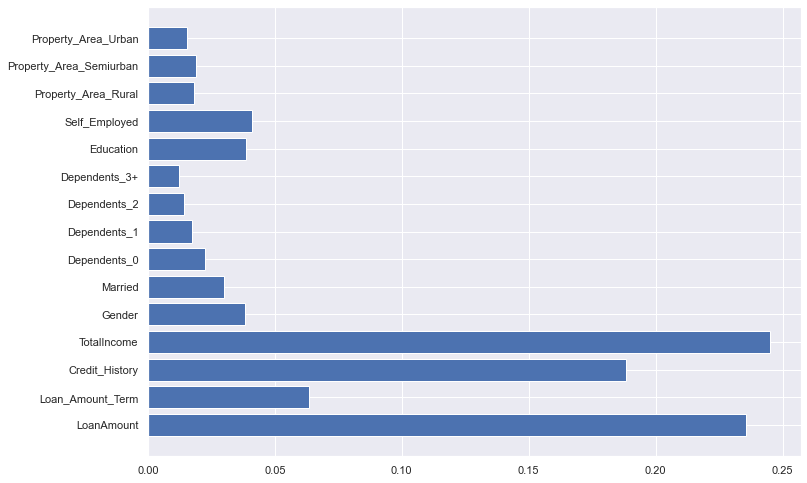

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
X_train,X_test,Y_train,Y_test=train_test_split(dataset_raw.loc[:,dataset_raw.columns!='Loan_Status'],dataset_raw['Loan_Status'],test_size=0.1,random_state=1)

# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)

Result = dict(zip(list(X_train.columns), model.feature_importances_))
print(Result)

plt.barh(range(len(Result)), list(Result.values()), align='center')
plt.yticks(range(len(Result)), list(Result.keys()))
plt.show()

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset_raw.loc[:,dataset_raw.columns!='Loan_Status'],dataset_raw['Loan_Status'],test_size=0.2,random_state=1)


**Data Processing (sklearn.preprocessing):**
    
    Rescale Data between 0 and 1 -> MinMaxScaler [useful for core optimization Gradient Descent,Regrssion,Kmean,NN]
    Standardizing data to Normal distribution with a mean of 0 and 1 Std ->StandardScaler [linear regresison,logistic regression]
    Normalize-> rescaling each obeservation sum to 1 (helpful in Sparse matrix)

In [47]:
MinMax=MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)


In [48]:
Issues_found

['imbalanaced data']

Imbalanced Data can be resolved using various techniques like, K-Fold Cross validatiom,SMOTE, Oversampling & Undersampling which can be handled easily at the Model Development Process

In [49]:
# #Import the SMOTE-NC
# from imblearn.over_sampling import SMOTENC
# #Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
# smotenc = SMOTENC([1],random_state = 101)
# X_oversample, y_oversample = smotenc.fit_resample(dataset_raw.loc[:,dataset_raw.columns!='Loan_Status'],dataset_raw['Loan_Status'])
# Issues_found.remove("imbalanaced data")


**Thanks,Stay Tuned!**